<a href="https://colab.research.google.com/github/MLDLNLPDataGuy/Stock_price_Heroku_Deployement/blob/main/Linear_Regression_using_Scikit%26ApacheSpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting House Price using Scikit Linear Regression

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/content/boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
x = df.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df.loc[:,'MEDV']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [16]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train,y_train)


In [17]:
df['predictions'] = model.predict(x)

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predictions
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.099552
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,24.812063
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.171206
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.250995
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.459210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,23.591141
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,22.618485
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,27.488871
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,26.044779


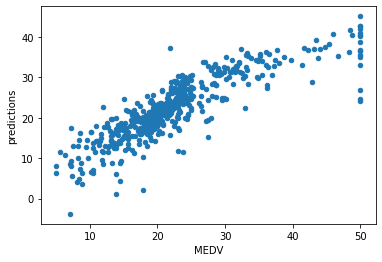

In [21]:
df[['MEDV','predictions']].plot(kind = 'scatter',x='MEDV',y= 'predictions')

In [23]:
from sklearn.metrics import r2_score
r2_score(df['MEDV'],df['predictions'])

0.7388692337472446

## Predicting House Price using Scikit Linear Regression

In [ ]:
!pip install pyspark

In [25]:
import pyspark

In [26]:
from pyspark.sql import SparkSession

In [27]:
spark = SparkSession.builder.appName('linear_reg').getOrCreate()

In [28]:
df = spark.read.csv('/content/boston.csv',inferSchema=True,header=True)

In [29]:
df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|MEDV|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [32]:
from pyspark.ml.feature import VectorAssembler
training_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
vector_assembler = VectorAssembler(inputCols=training_features,outputCol="features")
df_with_feature_vector = vector_assembler.transform(df)
df_with_feature_vector.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM| AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|MEDV|            features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
only showing top 5 rows



In [33]:
train_df,test_df = df_with_feature_vector.randomSplit([0.8,0.2],seed = 17)

In [34]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features",labelCol = 'MEDV')
model = lr.fit(train_df)

In [36]:
prediction_df = model.transform(test_df)
prediction_df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM| AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|MEDV|            features|        prediction|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|30.000688936297493|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|[0.01381,80.0,0.4...| 40.09430412272577|
|0.01538|90.0| 3.75|   0|0.394|7.454|34.2|6.3361|  3|244|   15.9|386.34| 3.11|44.0|[0.01538,90.0,3.7...| 36.74928869167898|
|0.02187|60.0| 2.93|   0|0.401|  6.8| 9.9|6.2196|  1|265|   15.6|393.37| 5.03|31.1|[0.02187,60.0,2.9...|31.714240146703688|
|0.02498| 0.0| 1.89|   0|0.518| 6.54|59.7|6.2669|  1|422|   15.9|389.96| 8.65|16.5|[0.02498,0.0,1.89...|22.638814327731385|
+-------

In [38]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol = 'MEDV',metricName='r2')
evaluator.evaluate(prediction_df)

0.7720228691637966